In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Data Exploration

Using the data frame library, we loaded the two datasets to the Jupiter lab environment:  
## Loading Heart Dataset:

In [2]:
df = pd.read_csv('heart_disease_missing.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


## Feature descriptions
### Below is the group of features presents in the dataset segregated by their type (numerical, categorical, ordinal, binary)

## A. Binary
sex (0 = female; 1 = male)

fbs: Fasting blood sugar > 120 mg/dl

exang: Exercise induced angina (0 = no; 1 = yes)
## B. Categorical
cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)

restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)

slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)

thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)
## C. Ordinal
ca: number of major vessels (0-3) colored by flourosopy
## D. Numeric
age

oldpeak: ST depression induced by exercise relative to rest

trestbps: Resting blood pressure

chol: Serum cholestoral in mg/dl

thalach: Maximum heart rate achieved during thalium stress test

## E. Target
 target: 1 = heart disease; 0 = no heart disease

In [3]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

In [4]:
# simple numeric encoding the categorical variables for easy data exploration

df.cp = df.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
df.restecg = df.restecg.replace({0:'LV hyper', 1:'Normal', 2:'ST-T wave'})
df.slope = df.slope.replace({0:'down', 1:'up', 2:'flat'})
df.thal = df.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Revers.'})

In [5]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target
count,212.000000,212.000000,205.000000,202.000000,212.000000,208.000000,212.000000,200.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,131.784610,244.133256,0.132075,149.647978,0.344340,1.113106,0.731132,2.349112,0.542453
std,9.145339,0.464130,18.057222,46.444257,0.339374,22.076206,0.476277,1.255908,1.038762,0.602117,0.499374
min,29.000000,0.000000,93.944184,126.085811,0.000000,88.032613,0.000000,-0.185668,0.000000,0.858554,0.000000
25%,47.000000,0.000000,119.968114,211.969594,0.000000,135.946808,0.000000,0.050778,0.000000,1.949795,0.000000
50%,55.000000,1.000000,130.010256,241.467023,0.000000,151.939216,0.000000,0.726060,0.000000,2.078759,1.000000
75%,61.000000,1.000000,139.965470,272.484222,0.000000,165.260092,1.000000,1.816733,1.000000,2.970842,1.000000
max,77.000000,1.000000,192.020200,406.932689,1.000000,202.138041,1.000000,6.157114,4.000000,3.277466,1.000000


## Loading Iris Datset

## Feature descriptions:
### The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

In [6]:
df_iris = pd.read_csv('iris_dataset_missing.csv')

In [7]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [8]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


In [9]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Data Cleaning 

### Interpolation and Missing values : 

As the dataset has some missing values in different rows and columns (features of data), we needed to apply methods to fill in the missing data. Different methods can be used, such as replacing with mean value, interpolation, and dropping missing values. Among these methods, interpolation tends to work the best since it does not drop any information and suggest different values for missing points.
Using the df.interpolate function, missing values are replaced by a linear interpolation function, which means that for each missing value in the dataset, a function is fitted to that specific feature of the dataset, and using the interpolation equation, the missing value is computed. 

In [10]:
print('heart disease dataset before interpolation:')
df.sample(10)

heart disease dataset before interpolation:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
83,43,1,Asympt.,150.013416,247.050289,0,Normal,NaN,0,1.554232,flat,0,1.944726,1
81,42,1,Non,120.024094,240.128242,1,Normal,194.115768,0,0.815970,down,0,3.120893,1
23,44,1,Atypical,129.826285,219.137169,0,NaN,188.099808,0,0.007390,flat,0,1.869469,1
152,39,1,Asympt.,118.050008,218.892940,0,Normal,140.066472,0,1.073929,up,0,2.964859,0
45,52,1,Non,172.122494,198.921917,1,Normal,162.100664,0,0.449844,flat,0,2.837360,1
132,57,0,Asympt.,139.880987,241.078989,0,Normal,123.105739,1,0.125609,up,0,2.910715,0
101,41,1,Asympt.,110.082793,171.907542,0,LV hyper,157.945065,0,0.041556,flat,0,3.053652,0
34,50,0,Non,120.206680,219.151011,0,Normal,157.986212,0,1.745627,up,0,1.917812,1
116,58,1,Non,105.048125,240.053401,0,LV hyper,154.000947,1,0.678808,up,0,2.991807,1
79,66,1,Asympt.,111.980955,212.113583,0,LV hyper,132.055350,1,-0.125970,flat,1,2.015536,0


In [11]:
print('heart disease dataset after interpolation:')

df = df.interpolate()
df.sample(10)

heart disease dataset after interpolation:


/var/folders/xy/48k7cdb93k15r865tb4x9pcc0000gn/T/ipykernel_1853/478698548.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
167,44,1,Non,130.018419,233.055206,0,Normal,179.067594,1,0.494747,flat,0,2.030763,1
39,46,0,Asympt.,138.060733,242.950158,0,LV hyper,152.025219,1,-0.065718,up,0,2.029877,1
19,42,1,Asympt.,139.963678,225.893538,0,Normal,177.909633,0,0.193651,flat,0,2.145303,1
84,34,1,Typical,118.187876,181.999626,0,LV hyper,174.145214,0,-0.110147,flat,0,1.964529,1
20,56,1,Typical,119.968114,192.953625,0,LV hyper,161.944248,0,0.086740,up,0,3.096325,1
107,65,0,Non,155.090693,268.937627,0,Normal,148.092518,0,0.735161,flat,0,2.135187,1
201,64,0,Non,140.076992,313.160873,0,Normal,133.112704,0,0.173430,flat,0,2.793799,1
114,35,1,Asympt.,120.034046,197.928589,0,Normal,129.735437,1,1.592099,up,0,2.914651,0
94,63,0,Asympt.,108.063708,269.012648,0,Normal,169.056147,1,1.718888,up,2,1.979477,0
60,40,1,Asympt.,143.866006,166.893249,0,LV hyper,114.061921,1,1.897220,up,0,2.762968,0


In [12]:
print('iris before interpolation:')
df_iris.sample(10)

iris before interpolation:


,sepal_length,sepal_width,petal_length,petal_width,species
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
33,5.593303,2.972604,3.707021,1.475423,Iris-versicolor
38,7.665933,3.802924,6.463494,2.086840,Iris-virginica
86,5.045108,1.946010,3.581591,0.891631,Iris-versicolor
81,6.117912,2.768688,4.751795,1.758927,Iris-virginica
44,6.193848,3.229915,5.947276,2.554837,Iris-virginica
97,5.636744,2.618691,3.866748,1.187135,Iris-versicolor
30,5.673096,4.409565,NaN,0.370518,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica


In [13]:
print('iris after interpolation:')
df_iris = df_iris.interpolate()
df_iris.sample(10)

iris after interpolation:


/var/folders/xy/48k7cdb93k15r865tb4x9pcc0000gn/T/ipykernel_1853/3403551548.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_iris = df_iris.interpolate()


,sepal_length,sepal_width,petal_length,petal_width,species
46,4.736073,3.482242,1.919475,0.262137,Iris-setosa
27,5.347376,3.767543,1.357151,0.221847,Iris-setosa
65,6.235536,3.425253,4.625589,2.423053,Iris-virginica
16,5.108534,3.235881,1.506456,0.354423,Iris-setosa
17,4.680728,3.049459,1.497591,0.171496,Iris-setosa
35,4.747376,2.905508,1.412034,0.180251,Iris-setosa
73,6.387364,3.146142,5.184828,2.277872,Iris-virginica
25,4.421580,3.298713,1.503468,0.276315,Iris-setosa
37,6.271780,2.521065,5.464018,1.896626,Iris-virginica
32,5.847160,2.743619,2.513606,0.748681,Iris-versicolor


## Cleaning the dataset before normalizing:

**Iris Dataset:** We Changed the target values to numerical before applying normalization:

In [14]:
iris_species = df_iris.species
print(set(iris_species))

{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


In [15]:
df_iris.species = df_iris.species.replace({'Iris-versicolor':0, 'Iris-virginica':1, 'Iris-setosa':2})
df_iris.head()

/var/folders/xy/48k7cdb93k15r865tb4x9pcc0000gn/T/ipykernel_1853/575655103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_iris.species = df_iris.species.replace({'Iris-versicolor':0, 'Iris-virginica':1, 'Iris-setosa':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,0
1,6.325517,2.115481,4.542052,1.413651,0
2,5.257497,3.814303,1.470660,0.395348,2
3,6.675168,3.201700,5.785461,2.362764,1
4,5.595237,2.678166,4.077750,1.369266,0


**Heart Dataset:** Converting categorical values to one hot!

To apply KNN to the heart dataset, we need to find a way to change the categorical values of the dataset to numerical. There are different methods for getting rid of categorical data, but changing the categorical data into one-hot columns is one of the best.

In [16]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope'])
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'target', 'cp_Asympt.', 'cp_Atypical', 'cp_Non',
       'cp_Typical', 'restecg_LV hyper', 'restecg_Normal', 'restecg_ST-T wave',
       'slope_down', 'slope_flat', 'slope_up'],
      dtype='object')

In [17]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up
0,76,0,140.102822,197.105970,0,115.952071,0,1.284822,0,2.175904,...,False,False,True,False,False,False,True,False,False,True
1,43,0,132.079599,341.049462,1,135.970028,1,3.110483,0,3.082071,...,True,False,False,False,True,False,False,False,False,True
2,47,1,107.899290,242.822816,0,152.210039,0,-0.023723,0,2.020827,...,False,False,True,False,False,True,False,False,True,False
3,51,1,99.934001,288.887585,0,143.049207,1,1.195082,0,2.100312,...,False,False,True,False,False,True,False,False,False,True
4,57,1,110.103508,334.952353,0,143.099327,1,3.082052,1,2.831509,...,True,False,False,False,False,True,False,False,False,True


### Normalization:
Normalization helps to keep all the dataset attributes on a common scale. If the scale of different features is hugely different, it causes problems when combining different features and classifying data. Normalization can be done with different methods : 

Zscore Normalization: Mean and standard deviation are computed for each column separately and 

Min-max Normalization: It changes all the values to a 0-1 scale by changing the data distribution.  It shifts all the variables so that the smallest is 0 and the biggest is 1.

In [18]:
from sklearn import preprocessing

Min-Max Normalization of the heart dataset:

In [19]:
print('heart disease dataset before min-max normalization')
df.sample(10)

heart disease dataset before min-max normalization


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up
194,55,1,129.726329,261.957665,0,155.051619,0,-0.032862,0,1.917366,...,False,True,False,False,False,True,False,False,True,False
150,71,0,159.963230,302.009742,0,162.062949,0,0.393740,2,1.852958,...,False,True,False,False,False,True,False,False,True,False
76,52,1,134.119989,200.897695,0,158.001746,0,0.730636,1,1.981798,...,False,True,False,False,False,True,False,False,True,False
210,41,1,129.918793,214.008059,0,167.851493,0,1.992138,0,1.879487,...,False,False,True,False,True,False,False,False,False,True
124,64,1,119.969609,246.013498,0,95.981029,1,2.267279,1,1.993898,...,True,False,False,False,True,False,False,True,False,False
95,60,0,150.135667,240.271968,0,170.894146,0,0.721484,0,2.002092,...,False,False,False,True,False,True,False,False,True,False
132,57,0,139.880987,241.078989,0,123.105739,1,0.125609,0,2.910715,...,True,False,False,False,False,True,False,False,False,True
103,38,1,138.127030,174.925633,0,173.028229,0,0.038206,4,1.947048,...,False,False,True,False,False,True,False,False,True,False
137,57,1,130.032119,130.990655,0,115.202903,1,1.248761,1,2.966171,...,True,False,False,False,False,True,False,False,False,True
108,69,1,139.921158,254.119878,0,145.838575,0,2.046385,3,2.973040,...,False,False,True,False,True,False,False,False,False,True


In [20]:
heart_disease_values = df.values
min_max_scaler = preprocessing.MinMaxScaler()
heart_disease_values_scaled = min_max_scaler.fit_transform(heart_disease_values)
df = pd.DataFrame(heart_disease_values_scaled, columns=df.columns)

print('heart disease dataset after min-max normalization')
df.sample(10)

heart disease dataset after min-max normalization


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up
0,0.979167,0.0,0.470641,0.252879,0.0,0.244681,0.0,0.231837,0.00,0.544604,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
189,0.270833,1.0,0.265611,0.601477,0.0,0.649379,0.0,0.025765,0.00,0.493384,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
141,0.458333,0.0,0.469976,0.647370,0.0,0.474539,0.0,0.269638,0.25,0.460601,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
63,0.604167,1.0,0.386951,0.348888,0.0,0.744026,0.0,0.532869,0.50,1.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,0.520833,1.0,0.573477,0.377543,0.0,0.674333,0.0,0.299695,0.00,0.873106,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
94,0.708333,0.0,0.143965,0.508914,0.0,0.710076,1.0,0.300271,0.50,0.463400,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
114,0.125000,1.0,0.266017,0.255808,0.0,0.365476,1.0,0.280282,0.00,0.850009,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27,0.479167,1.0,0.346756,0.459006,0.0,0.639771,1.0,0.020459,0.25,0.900548,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20,0.562500,1.0,0.265344,0.238093,0.0,0.647749,0.0,0.042948,0.00,0.925115,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
88,0.625000,1.0,0.774657,0.712096,0.0,0.454644,1.0,0.563167,0.00,0.859052,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Instead of min-max normalization, we could have used zscore normalization. The following cell applies zscore normalization to the heart dataset:

In [21]:
heart_disease_values = df.values
zscore_scaler = preprocessing.StandardScaler()
heart_disease_values_scaled_zscore = zscore_scaler.fit_transform(heart_disease_values)
df_zscore = pd.DataFrame(heart_disease_values_scaled_zscore, columns=df.columns)

print('heart disease dataset after zscore normalization:')
df_zscore.sample(10)

heart disease dataset after zscore normalization:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up
93,-0.691747,-1.48732,-0.106407,0.679549,-0.390095,-0.482112,-0.724693,-0.818447,-0.705515,-0.855258,...,-0.953892,-0.429369,1.520691,-0.265908,-0.901091,0.981307,-0.138675,-0.275939,1.019049,-0.867217
112,-1.020559,0.67235,-0.936961,0.348172,-0.390095,1.621548,-0.724693,0.152958,-0.705515,-0.736276,...,1.048337,-0.429369,-0.657596,-0.265908,1.109765,-1.019049,-0.138675,-0.275939,1.019049,-0.867217
211,-1.458976,-1.48732,-1.101848,0.527726,-0.390095,1.021687,1.379895,-0.828027,-0.705515,-0.262523,...,-0.953892,-0.429369,1.520691,-0.265908,1.109765,-1.019049,-0.138675,-0.275939,1.019049,-0.867217
181,-0.362934,-1.48732,-0.109274,0.264445,-0.390095,-0.027319,-0.724693,-0.432598,-0.705515,-0.406221,...,-0.953892,-0.429369,1.520691,-0.265908,1.109765,-1.019049,-0.138675,-0.275939,1.019049,-0.867217
44,-1.678184,-1.48732,-2.104444,-0.974529,-0.390095,1.342878,-0.724693,-0.768617,-0.705515,-0.621406,...,-0.953892,-0.429369,1.520691,-0.265908,-0.901091,0.981307,-0.138675,-0.275939,1.019049,-0.867217
174,-0.034122,-1.48732,0.004032,0.964104,2.563480,0.428761,1.379895,-0.911062,0.259448,-0.757997,...,-0.953892,2.329000,-0.657596,-0.265908,1.109765,-1.019049,-0.138675,-0.275939,1.019049,-0.867217
105,-0.034122,0.67235,-0.387365,0.639938,-0.390095,0.104268,-0.724693,-0.433848,0.259448,-0.489704,...,-0.953892,-0.429369,1.520691,-0.265908,1.109765,-1.019049,-0.138675,3.623994,-0.981307,-0.867217
94,0.952315,-1.48732,-1.323819,0.549651,-0.390095,0.886594,1.379895,0.502495,1.224411,-0.619995,...,1.048337,-0.429369,-0.657596,-0.265908,-0.901091,0.981307,-0.138675,-0.275939,-0.981307,1.153113
18,-0.362934,0.67235,-2.104999,-0.366278,-0.390095,0.197544,1.379895,-0.956562,0.259448,1.301832,...,-0.953892,-0.429369,1.520691,-0.265908,-0.901091,0.981307,-0.138675,-0.275939,1.019049,-0.867217
47,0.842711,-1.48732,0.997839,0.003776,-0.390095,0.192867,1.379895,0.258053,-0.705515,-0.568169,...,1.048337,-0.429369,-0.657596,-0.265908,-0.901091,0.981307,-0.138675,-0.275939,-0.981307,1.153113


Min-Max normalization of the Iris dataset:

In [22]:
iris_values = df_iris.values
min_max_scaler = preprocessing.MinMaxScaler()
iris_values_scaled = min_max_scaler.fit_transform(iris_values)
df_iris = pd.DataFrame(iris_values_scaled, columns=df_iris.columns)
df_iris.species = df_iris.species * 2

print('iris dataset after min-max normalization')
df_iris.sample(10)

iris dataset after min-max normalization


,sepal_length,sepal_width,petal_length,petal_width,species
56,0.206471,0.571943,0.056646,0.142003,2.0
24,0.368043,0.492687,0.532838,0.490039,0.0
23,0.975110,0.394432,0.966267,0.731087,1.0
14,0.364970,0.177582,0.489006,0.420901,0.0
91,0.365313,0.235728,0.586260,0.453674,0.0
54,0.556730,0.452590,0.639565,0.509243,0.0
31,0.236165,0.660503,0.050067,0.167091,2.0
64,0.578388,0.488937,0.570118,0.524796,0.0
4,0.362512,0.297195,0.530848,0.538801,0.0
19,0.416166,0.522843,0.660121,0.686897,0.0


Instead of min-max normalization, we could have used zscore normalization. The following cell applies zscore normalization to the Iris dataset:

In [23]:
iris_values = df_iris.values
zscore_scaler = preprocessing.StandardScaler()
iris_values_scaled = zscore_scaler.fit_transform(iris_values)
df_iris_zscore = pd.DataFrame(iris_values_scaled, columns=df_iris.columns)
df_iris_zscore.species = df_iris.species

print('iris dataset after zscore normalization')
df_iris_zscore.sample(10)

iris dataset after zscore normalization


,sepal_length,sepal_width,petal_length,petal_width,species
56,-0.935548,0.662016,-1.406760,-1.138584,2.0
62,1.387171,1.357218,1.342564,1.632299,1.0
16,-0.875047,0.394092,-1.322291,-1.078948,2.0
81,0.302036,-0.656519,0.523333,0.713803,1.0
35,-1.296210,-0.348842,-1.375989,-1.301266,2.0
29,-0.493026,-1.048220,0.109304,0.260066,0.0
75,0.685248,-1.500993,0.457254,0.191068,0.0
25,-1.676136,0.535388,-1.323990,-1.178647,2.0
91,-0.296204,-1.200607,0.320748,-0.074270,0.0
88,1.818981,-0.597821,1.218602,0.971475,1.0


Before we go to the next section, we changed the targets from float to int!

In [24]:
df.target = df.target.astype(int)
df.target

0      1
1      0
2      0
3      1
4      0
      ..
207    0
208    1
209    1
210    1
211    1
Name: target, Length: 212, dtype: int64

In [25]:
df_iris.species = df_iris.species.astype(int)
df_iris.species

0      0
1      0
2      2
3      1
4      0
      ..
100    2
101    0
102    2
103    0
104    2
Name: species, Length: 105, dtype: int64

## Pair Plots 
To find out the relation between the different attributes of the datasets, plotting pairs of features helps.
For the Iris dataset, the pairs plot of all four features is plotted. 
For the heart disease dataset, as we wish to find out information about heart attack, features such as sex and chol, we observe that males with high cholesterol have less heart disease than females.

### Heart Dataset:

In [26]:
df.target = df.target.replace({0:'no_heart_disease', 1:'heart_disease'})
df.sex = df.sex.replace({0: 'female' , 1:'male'})
df.fbs = df.fbs.replace({0: 'low_fasting_sugar' , 1:'high_fasting_sugar'})
df.exang= df.exang.replace({0: 'no_exercise' , 1:'exercise'})

In [29]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

# treatbps : resting blodd pressure
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
# restecg: resting electroca rdiographic results 
# thalach: maximum heart rate achieved 
# exang: exercise induced angina (1 = yes; 0 = no) 
fig_df = px.scatter_matrix(df , dimensions=["sex", "chol" , "trestbps" ,"fbs" ,"exang"],
    color="target" )

fig_df.show()

### iris dataset:

In [30]:
df_iris.species = df_iris.species.replace({0: 'Iris-versicolor' , 1: 'Iris-setosa' , 2: 'Iris-virginica'})

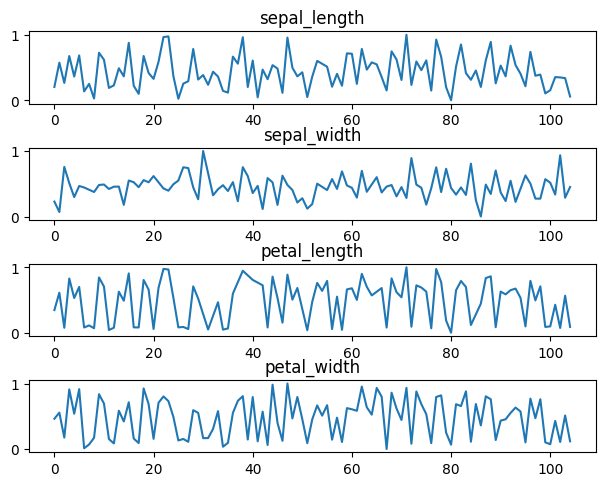

In [31]:
fig, axes = plt.subplots(nrows=4)
fig.tight_layout()
for i in range(df_iris.shape[1]-1):
    df_iris.iloc[:,i].plot(ax=axes[i])
    axes[i].set_title(df_iris.columns[i])

In [32]:
import plotly.express as px

fig = px.scatter_matrix(df_iris , dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species" )

fig.show()

## Correlations, Mean, Variance, Skew, and Kurtosis 

### Heart Dataset:

In [37]:
from sklearn.model_selection import train_test_split
df.target = df.target.replace({'no_heart_disease' : 0 , 'heart_disease' : 1})
df.sex = df.sex.replace({'female':0 ,'male' :1})
df.fbs = df.fbs.replace({'low_fasting_sugar':0 , 'high_fasting_sugar':1})
df.exang= df.exang.replace({'no_exercise':0 , 'exercise':1})

In [38]:
print("Correlation : ")
print(df.corr())
print("Mean : ")
print(df.mean())
print("Variance")
print(df.var())
print("Skew")
print(df.skew())
print(df.kurtosis())

Correlation : 
                        age       sex  trestbps      chol       fbs   thalach  \
age                1.000000 -0.140074  0.318457  0.163386  0.050823 -0.383527   
sex               -0.140074  1.000000 -0.049125 -0.185987  0.081750  0.014529   
trestbps           0.318457 -0.049125  1.000000  0.130216  0.154423 -0.104446   
chol               0.163386 -0.185987  0.130216  1.000000 -0.021913 -0.039059   
fbs                0.050823  0.081750  0.154423 -0.021913  1.000000  0.036279   
thalach           -0.383527  0.014529 -0.104446 -0.039059  0.036279  1.000000   
exang              0.114545  0.122773  0.103134  0.080550  0.098474 -0.364503   
oldpeak            0.131899  0.100760  0.141307  0.059598 -0.085698 -0.352459   
ca                 0.266278  0.120466  0.068974  0.039647  0.128097 -0.179542   
thal               0.048985  0.200132  0.000932 -0.034989  0.008044 -0.158275   
target            -0.196967 -0.249428 -0.107400 -0.066440 -0.005276  0.418747   
cp_Asympt.   

Based on the above results, we can see that “Age” has the most correlation with trestbps” (resting blood pressure), 0.3, which identifies the aging can increase blood pressure, but its effect is slight. “age “ is not correlated significantly with other features. it is also negatively correlated with “thalach”, which is maximum heart rate achieved, and it indicates that aging decreases the maximum heart rate achieved. 

The “Sex” attribute is not correlated with any of the features, which shows that our selection of features was not correct. “Sex” does not noticeably affect features related to heart disease.
“Trestbps” (resting blood pressure) is not correlated with features, except “age”, which is described above. 
“Chol”, “FBS” which is fasting blood sugar, are not correlated with other features. 
“Thalach”(max heart rate achieved) is also negatively correlated to “exang” (exercising), which means exercising reduces the maximum heart rate since the heart will get more efficient by exercising.  “Old peak” is negatively correlated to “thalach”. oldpeak is depression induced by exercise relative to rest.

### Iris Dataset:

In [47]:
print("Correlation : ")
print(df_iris.corr(numeric_only=True))
print("Mean : ")
print(df_iris.mean(numeric_only=True))
print("Variance")
print(df_iris.var(numeric_only=True))
print("Skew")
print(df_iris.skew(numeric_only=True))
print(df_iris.kurtosis(numeric_only=True))

Correlation : 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.026453      0.824509     0.809915
sepal_width      -0.026453     1.000000     -0.247438    -0.257475
petal_length      0.824509    -0.247438      1.000000     0.895026
petal_width       0.809915    -0.257475      0.895026     1.000000
Mean : 
sepal_length    0.438904
sepal_width     0.452445
petal_length    0.487926
petal_width     0.475423
dtype: float64
Variance
sepal_length    0.062319
sepal_width     0.032896
petal_length    0.094893
petal_width     0.086578
dtype: float64
Skew
sepal_length    0.401506
sepal_width     0.363281
petal_length   -0.253082
petal_width    -0.074751
dtype: float64
sepal_length   -0.544820
sepal_width     0.626489
petal_length   -1.364572
petal_width    -1.315451
dtype: float64


As we expect, there is no significant relationship between the length and the width of the sepal of flowers. But sepal length and petal length, and width are correlated. 

The mean and variance of Iris features are almost in the same range. 
The “Petal width” feature has a different range in skew compared to other features. 
Both “petal width” and  “petal length” have a negative Kurtosis and much bigger in value than other features. 

# KNN
### Heart Dataset:

**Part 1:** We divide the data into a training set and a test set (80%, 20%). We set the random seed for splitting (random_state=98) in the train_test_split function to get the same split every time we the program.

Before splitting train and test, the following cells move the target column in the heart dataframe to the last column.

In [48]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'target', 'cp_Asympt.', 'cp_Atypical', 'cp_Non',
       'cp_Typical', 'restecg_LV hyper', 'restecg_Normal', 'restecg_ST-T wave',
       'slope_down', 'slope_flat', 'slope_up'],
      dtype='object')

In [49]:
new_columns = df.columns[0:10].tolist() + df.columns[11:].tolist()
new_columns.append(df.columns[10])
df = df[new_columns]

In [50]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'cp_Asympt.', 'cp_Atypical', 'cp_Non', 'cp_Typical',
       'restecg_LV hyper', 'restecg_Normal', 'restecg_ST-T wave', 'slope_down',
       'slope_flat', 'slope_up', 'target'],
      dtype='object')

Splitting test and train:

In [51]:
X = df.iloc[:,0:-1]
y = df.iloc[: , -1]

X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=98)

** Heart Dataset** In this part, we train the model with the classifier’s default parameters. The following cell prints the accuracy of the model.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.8604651162790697

** [Heart Dataset]** Finding the best parameters to tune the classifier.

For the Heart dataset, we divide the training set into a (90%,10%) split into train and validate sets. We fit the KNN classifier for a range of k values on the new training set only, producing accuracy scores with the validation set.

The best k is printed after the following cell:

In [53]:
X_train_new, X_validation, y_train_new, y_validation= train_test_split(X_train, y_train, test_size=0.1 , random_state=98)

k = [1,5,10,15,20,25,30,35]
acc = np.zeros([len(k)])
for i in range(len(k)):
    neigh = KNeighborsClassifier(n_neighbors=k[i])
    neigh.fit(X_train_new, y_train_new)
    acc[i] = neigh.score(X_validation, y_validation)
k_max_index =  np.argmax(acc)  
print('the best k:', k[k_max_index])  
print('the best accuracy:', acc[k_max_index])

the best k: 25
the best accuracy: 0.8823529411764706


The accuracy vs k plot: 

25 is the best k.

Text(0, 0.5, 'Accuracy')

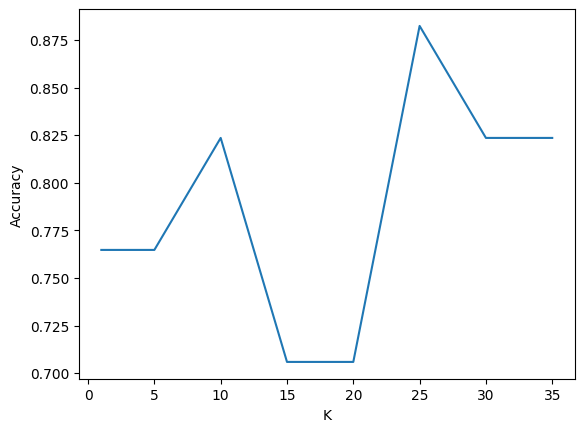

In [54]:
#plot k - acc
plt.plot(k, acc)
plt.xlabel("K")
plt.ylabel("Accuracy")

**Do you find any advantage to one form of validation over the other?** For the heart dataset, we divided the training set into a (90%,10%) split into train and validate sets. For the Iris dataset, 5-fold cross-validation is used further ahead in this notebook. k-fold cross-validation works better for smaller datasets, while it is better to use (90%,10%) splitting for larger ones. To further compare these two validation methods, the following cell shows what would have happened if we used k-fold cross-validation for the heart dataset instead of (90%,10%) splitting. 

This cell shows that if we have used 5-fold cross-validation, we would have picked k=30 as the best k, which gives worse final accuracy comparing to k=25, which is the k picked by using (90%,10%) splitting for picking the validation set. This confirms the fact that it is better to use (90%,10%) splitting for the heart dataset, which is bigger than the Iris dataset.

In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
kf.get_n_splits(y_train)
k = [1,5,10,15,20,25,30,35]
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    #print("K is : " , k[i])
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = y_train[train_index], y_train[test_index]
        #print(test_index)
        neigh = KNeighborsClassifier(n_neighbors=k[i])
        neigh.fit(X_train_fold, y_train_fold)
        acc[i,j] = neigh.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
neigh = KNeighborsClassifier(k_best)
neigh.fit(X_train, y_train)
print ('best accuracy if we used k-fold cross validation insted of 90-10 split:', neigh.score(X_test, y_test))

the best k: 30
0.8399286987522281
best accuracy if we used k-fold cross validation insted of 90-10 split: 0.7906976744186046


**[Heart Dataset]:** In this part, using the best-found parameter, we fit the model on the entire training set and predict the target on the test set.

The following cell prints the accuracy, while the next cell prints AUC, f1-score, recall, and precision of the KNN classifier.

In [56]:
k_best = 25
neigh = KNeighborsClassifier(k_best)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.813953488372093

In [57]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

pred = neigh.predict(X_test)
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

recall: 0.8076923076923077
precision: 0.875
f1: 0.84
auc: 0.8156108597285068


**What was the effect of changing k?** k = 5 and k = 10 works better than k = 1. However, k = 15 and k = 20 works worse than k = 1, 5, or 10. k = 25 is the best k, while k = 30 and k = 35 are slightly worse than k = 25.
 
**Was the accuracy always affected the same way with an increase of k?** As we can see in the results of part CM5, the accuracy is not always affected the same way after increasing k. 

### Iris Dataset:

**Part 1:** We divide the data into a training set and a test set (80%, 20%). We set the random seed for splitting (random_state=98) in the train_test_split function to get the same split every time we the program.



In [58]:
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris[['species']]
print(type(X))
X_iris = X.to_numpy()
y_iris = y.to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X_iris, y_iris, test_size=0.2 , random_state=98)

<class 'pandas.core.frame.DataFrame'>


**Part 2 [Iris Dataset]:** In the part, we train the model with the classifier’s default parameters. The following cell prints the accuracy of the model.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

0.9047619047619048

**Part 3 [Iris Dataset]:** Finding the best parameters to tune the classifier.

For the Iris dataset, we use 5-fold cross validation.

The best k is printed after the following cell:

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
kf.get_n_splits(y_train)
k = [1,5,10,15,20,25,30,35]
acc = np.zeros([len(k),5])
for i in range(len(k)):
    j = 0
    #print("K is : " , k[i])
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = y_train[train_index], y_train[test_index]
        #print(test_index)
        neigh = KNeighborsClassifier(n_neighbors=k[i])
        neigh.fit(X_train_fold, y_train_fold[:,0])
        acc[i,j ] = neigh.score(X_validation, y_validation)
        j +=1

k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])

the best k: 5


The accuracy vs k plot:

As shown in the plot, the best k is 5.

Text(0, 0.5, 'Accuracy')

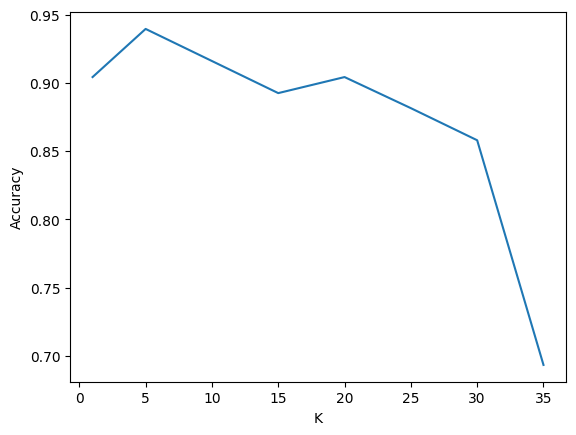

In [61]:
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel("K")
plt.ylabel("Accuracy")

**[Iris Dataset]:** In this part, using the best-found parameter, we fit the model on the entire training set and predict the target on the test set.

The following cell prints the accuracy, while the next cell prints AUC, f1-score, recall, and precision of the KNN classifier.

Classification for the Iris dataset is not a binary classification task, and we have three different targets. We, therefore, need to calculate the micro and macro version for recall score, precision, and f1 score.

In [62]:
neigh = KNeighborsClassifier(5)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test[:,0])

0.9047619047619048

In [63]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

pred = neigh.predict(X_test)
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.6154320987654321


**What was the effect of changing k?** k = 5 does better than k = 1, however any k bigger than 5 does worse than k = 5.
 
**Was the accuracy always affected the same way with an increase of k?** As we can see in the results of part CM5, the accuracy always decreases after increasing k, except for when we increase k = 1 to k = 5. For k > 5, the accuracy always decreases after increasing k.

# Trying to Improve the Model 
### A.Weighted KNN
**1.Heart Dataset:**

Loading the train, test, and validation data:

In [64]:
X = df.iloc[:,0:-1]
y = df.iloc[: , -1]

X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2 , random_state=98)
X_train_new, X_validation, y_train_new, y_validation= train_test_split(X_train, y_train, 
                                                                       test_size=0.1 , random_state=98)

The following cell shows the result of using KNN with default paramteres:

A. Result on validation data:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_new, y_train_new)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.7647058823529411
recall: 0.75
precision: 0.75
f1: 0.75
auc: 0.763888888888889


B. Result on test data:

In [66]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.8604651162790697
recall: 0.8846153846153846
precision: 0.8846153846153846
f1: 0.8846153846153846
auc: 0.8540723981900451


For improving the classification result, we first tried changing the distance metric. The following code shows the result of using manhattan distance as the distance metric. Using Manhattan distance improves the accuracy, recall score, f1 score, and the AUC score for the validation set.

**KNN with manhattan distance (l1):**

A. Result on validation data:

In [67]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 1)
neigh.fit(X_train_new, y_train_new)
neigh.score(X_validation, y_validation)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.8235294117647058
recall: 0.875
precision: 0.7777777777777778
f1: 0.8235294117647058
auc: 0.8263888888888888


B. Result on test data:

In [68]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 1)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.8837209302325582
recall: 0.9230769230769231
precision: 0.8888888888888888
f1: 0.9056603773584906
auc: 0.8733031674208145


In this part, for changing the distance metric, we tried using the Minkowski metric with different power parameters.
The parameter p in the following cells shows the power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

The three cells below show that the Minkowski metric with p=2 works better than when p equals 3 or 4.

A. Minkowski metric with p = 2, Result on validation data:

In [69]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 2)
neigh.fit(X_train_new, y_train_new)
neigh.score(X_validation, y_validation)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.7647058823529411
recall: 0.75
precision: 0.75
f1: 0.75
auc: 0.763888888888889


B. Minkowski metric with p = 2, Result on test data:

In [70]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 2)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.8604651162790697
recall: 0.8846153846153846
precision: 0.8846153846153846
f1: 0.8846153846153846
auc: 0.8540723981900451


A. Minkowski metric with p = 3, Result on validation data:

In [71]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 3)
neigh.fit(X_train_new, y_train_new)
neigh.score(X_validation, y_validation)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.7647058823529411
recall: 0.75
precision: 0.75
f1: 0.75
auc: 0.763888888888889


B. Minkowski metric with p = 3, Result on test data:

In [72]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.8372093023255814
recall: 0.8461538461538461
precision: 0.88
f1: 0.8627450980392157
auc: 0.8348416289592759


A. Minkowski metric with p = 4, Result on validation data:

In [73]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 4)
neigh.fit(X_train_new, y_train_new)
neigh.score(X_validation, y_validation)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.7647058823529411
recall: 0.75
precision: 0.75
f1: 0.75
auc: 0.763888888888889


B. Minkowski metric with p = 4, Result on test data:

In [74]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 4)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.8372093023255814
recall: 0.8461538461538461
precision: 0.88
f1: 0.8627450980392157
auc: 0.8348416289592759


The following cell shows the result of using the Chebyshev distance metric instead of the Minkowski metric. The following result shows that the Minkowski metric works better for this dataset.

A. Result on validation data:

In [75]:
neigh = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
neigh.fit(X_train_new, y_train_new)
neigh.score(X_validation, y_validation)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation))
print('recall:', recall_score(y_validation, pred))
print('precision:', precision_score(y_validation, pred))
print('f1:', f1_score(y_validation, pred))
print('auc:', roc_auc_score(y_validation, pred))

accuracy: 0.7058823529411765
recall: 0.625
precision: 0.7142857142857143
f1: 0.6666666666666666
auc: 0.7013888888888888


B. Result on test data:

In [76]:
neigh = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test))
print('recall:', recall_score(y_test, pred))
print('precision:', precision_score(y_test, pred))
print('f1:', f1_score(y_test, pred))
print('auc:', roc_auc_score(y_test, pred))

accuracy: 0.7906976744186046
recall: 0.9230769230769231
precision: 0.7741935483870968
f1: 0.8421052631578947
auc: 0.755656108597285


**2.Iris Dataset**

Loading the train, test, and validation data for this dataset:

In [77]:
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris[['species']]
print(type(X))
X_iris = X.to_numpy()
y_iris = y.to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X_iris, y_iris, test_size=0.2 , random_state=98)
X_train_new, X_validation, y_train_new, y_validation= train_test_split(X_train, y_train, 
                                                                       test_size=0.1 , random_state=98)

<class 'pandas.core.frame.DataFrame'>


The following cell shows the result of using KNN with default paramteres.

Classification for the Iris dataset is not a binary classification task, and we have three different targets. We, therefore, need to calculate the micro and macro version for recall score, precision, and f1 score.

In [78]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 0.9047619047619048
recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.6154320987654321


For improving the classification result, we first tried changing the distance metric. The following code shows the result of using manhattan distance as the distance metric. Using Manhattan distance improves the accuracy, precision, recall score, f1 score, and the AUC score for the validation set.

**KNN with manhattan distance (l1):**

A. Result on validation data:

In [79]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 1)
neigh.fit(X_train_new, y_train_new[:,0])
neigh.score(X_validation, y_validation, sample_weight=None)

pred = neigh.predict(X_validation)
print('accuracy:', neigh.score(X_validation, y_validation, sample_weight=None))
print('recall micro:', recall_score(y_validation[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_validation[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_validation[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_validation[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_validation[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_validation[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_validation_numerical = np.array([dic[i] for i in y_validation[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_validation_numerical, neigh.predict_proba(X_validation), multi_class='ovr'))

accuracy: 0.8888888888888888
recall micro: 0.8888888888888888
recall macro: 0.9166666666666666
precision micro: 0.8888888888888888
precision macro: 0.9333333333333332
f1 micro: 0.8888888888888888
f1 macro: 0.9153439153439153
auc : 0.4333333333333333


B. Result on test data:

In [80]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 1)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 1.0
recall micro: 1.0
recall macro: 1.0
precision micro: 1.0
precision macro: 1.0
f1 micro: 1.0
f1 macro: 1.0
auc : 0.6617283950617284


In this part, for changing the distance metric, we tried using the Minkowski metric with different power parameters.
The parameter p in the following cells shows the power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

The three cells below show that the Minkowski metric with p=2 doesn't significantly differ in terms of results with the Minkowski metric with p equal to 3 or 4.

In [81]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 2)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 0.9047619047619048
recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.6154320987654321


In [82]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 3)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 0.9047619047619048
recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.6154320987654321


In [83]:
neigh = KNeighborsClassifier(n_neighbors=5, p = 4)
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 0.9047619047619048
recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.6154320987654321


The following cell shows the result of using the Chebyshev distance metric instead of the Minkowski metric. The Minkowski metric seems to work better for this dataset.

In [84]:
neigh = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
neigh.fit(X_train, y_train[:,0])
neigh.score(X_test, y_test, sample_weight=None)

pred = neigh.predict(X_test)
print('accuracy:', neigh.score(X_test, y_test, sample_weight=None))
print('recall micro:', recall_score(y_test[:,0], pred, average='micro'))
print('recall macro:', recall_score(y_test[:,0], pred, average='macro'))
print('precision micro:', precision_score(y_test[:,0], pred, average='micro'))
print('precision macro:', precision_score(y_test[:,0], pred, average='macro'))
print('f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
print('f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
print('auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

accuracy: 0.9047619047619048
recall micro: 0.9047619047619048
recall macro: 0.9444444444444445
precision micro: 0.9047619047619048
precision macro: 0.9166666666666666
f1 micro: 0.9047619047619048
f1 macro: 0.9220779220779222
auc : 0.5932098765432099


### B. Different NN Algorithms

This section includes testing different KNN algorithms for classification, including the ball tree algorithm, KD-tree algorithm, and the brute force KNN algorithm for the heart and Iris dataset.

**1. Heart Dataset:**

In [85]:
X = df.iloc[:,0:-1]
y = df.iloc[: , -1]

X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2 , random_state=98)
X_train_new, X_validation, y_train_new, y_validation= train_test_split(X_train, y_train, 
                                                                       test_size=0.1 , random_state=98)

A. Testing different algorithms on validation data:

B. Testing different algorithms on test data:

In [86]:
from sklearn.neighbors import KNeighborsClassifier

algorithms = ['ball_tree', 'kd_tree', 'brute']
for alg in algorithms:
    neigh = KNeighborsClassifier(n_neighbors=5, algorithm=alg)
    neigh.fit(X_train, y_train)
    print(alg, 'accuracy:', neigh.score(X_test, y_test))
    
    pred = neigh.predict(X_test)
    print(alg, 'recall:', recall_score(y_test, pred))
    print(alg, 'precision:', precision_score(y_test, pred))
    print(alg, 'f1:', f1_score(y_test, pred))
    print(alg, 'auc:', roc_auc_score(y_test, pred))

ball_tree accuracy: 0.8604651162790697
ball_tree recall: 0.8846153846153846
ball_tree precision: 0.8846153846153846
ball_tree f1: 0.8846153846153846
ball_tree auc: 0.8540723981900451
kd_tree accuracy: 0.8604651162790697
kd_tree recall: 0.8846153846153846
kd_tree precision: 0.8846153846153846
kd_tree f1: 0.8846153846153846
kd_tree auc: 0.8540723981900451
brute accuracy: 0.8604651162790697
brute recall: 0.8846153846153846
brute precision: 0.8846153846153846
brute f1: 0.8846153846153846
brute auc: 0.8540723981900451


The above results show that these three algorithms don't significantly differ in terms of the final result in this dataset.

**2. Iris Dataset:**

In [87]:
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris[['species']]
print(type(X))
X_iris = X.to_numpy()
y_iris = y.to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X_iris, y_iris, test_size=0.2 , random_state=98)

<class 'pandas.core.frame.DataFrame'>


In [88]:
from sklearn.neighbors import KNeighborsClassifier

algorithms = ['ball_tree', 'kd_tree', 'brute']
for alg in algorithms:
    neigh = KNeighborsClassifier(n_neighbors=5, algorithm=alg)
    neigh.fit(X_train, y_train[:,0])
    print(alg, 'accuray:', neigh.score(X_test, y_test))
    
    pred = neigh.predict(X_test)
    print(alg, 'recall micro:', recall_score(y_test[:,0], pred, average='micro'))
    print(alg, 'recall macro:', recall_score(y_test[:,0], pred, average='macro'))
    print(alg, 'precision micro:', precision_score(y_test[:,0], pred, average='micro'))
    print(alg, 'precision macro:', precision_score(y_test[:,0], pred, average='macro'))
    print(alg, 'f1 micro:', f1_score(y_test[:,0], pred, average='micro'))
    print(alg, 'f1 macro:', f1_score(y_test[:,0], pred, average='macro'))

    dic = {'Iris-versicolor':0 , 'Iris-setosa':1 , 'Iris-virginica':2}
    y_test_numerical = np.array([dic[i] for i in y_test[:,0]]).reshape([-1,1])
    print(alg, 'auc :', roc_auc_score(y_test_numerical, neigh.predict_proba(X_test), multi_class='ovr'))

ball_tree accuray: 0.9047619047619048
ball_tree recall micro: 0.9047619047619048
ball_tree recall macro: 0.9444444444444445
ball_tree precision micro: 0.9047619047619048
ball_tree precision macro: 0.9166666666666666
ball_tree f1 micro: 0.9047619047619048
ball_tree f1 macro: 0.9220779220779222
ball_tree auc : 0.6154320987654321
kd_tree accuray: 0.9047619047619048
kd_tree recall micro: 0.9047619047619048
kd_tree recall macro: 0.9444444444444445
kd_tree precision micro: 0.9047619047619048
kd_tree precision macro: 0.9166666666666666
kd_tree f1 micro: 0.9047619047619048
kd_tree f1 macro: 0.9220779220779222
kd_tree auc : 0.6154320987654321
brute accuray: 0.9047619047619048
brute recall micro: 0.9047619047619048
brute recall macro: 0.9444444444444445
brute precision micro: 0.9047619047619048
brute precision macro: 0.9166666666666666
brute f1 micro: 0.9047619047619048
brute f1 macro: 0.9220779220779222
brute auc : 0.6154320987654321


The above results show that these three algorithms don't significantly differ in terms of the final result in this dataset.